# Hand Gesture Recognition using CNN

In this notebook, we'll build a Convolutional Neural Network (CNN) model to classify different hand gestures based on images. We'll preprocess our data, define the model architecture, train the model, and finally visualize the performance metrics.






# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical


# Define the dataset path and visualize a sample image

Here, we define the path to the dataset and list all subject folders to filter out any incorrect entries.
We also load and visualize a sample hand gesture image from a specific subject and gesture type. This helps in understanding the dataset structure and the kind of images we'll be working with.


Filtered Subject folders: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'leapGestRecog']


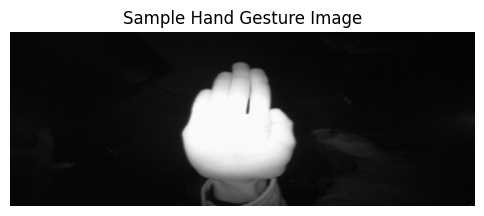

In [2]:
# Define the path to the dataset
dataset_path = 'leapGestRecog'

# List the directories and filter out any incorrect entries
subject_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

print("Filtered Subject folders:", subject_folders)

# Example of loading images from a specific subject and gesture
example_subject = '00'
example_gesture = '01_palm'
example_path = os.path.join(dataset_path, example_subject, example_gesture)

# Load a sample image to visualize
sample_image_path = os.path.join(example_path, 'frame_00_01_0192.png')
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if sample_image is None:
    print(f"Error loading image: {sample_image_path}")
else:
    # Display the sample image
    plt.figure(figsize=(6, 6))
    plt.imshow(sample_image, cmap='gray')
    plt.title('Sample Hand Gesture Image')
    plt.axis('off')
    plt.show()


# Load and preprocess the dataset

In this cell, we load the hand gesture images from each subject's folder, resize them to a uniform size (64x64 pixels), and normalize the pixel values to range between 0 and 1.

We also split the dataset into training and testing sets to evaluate the model's performance later.

Finally, we display some sample images with their corresponding labels to get a sense of the data distribution and content.


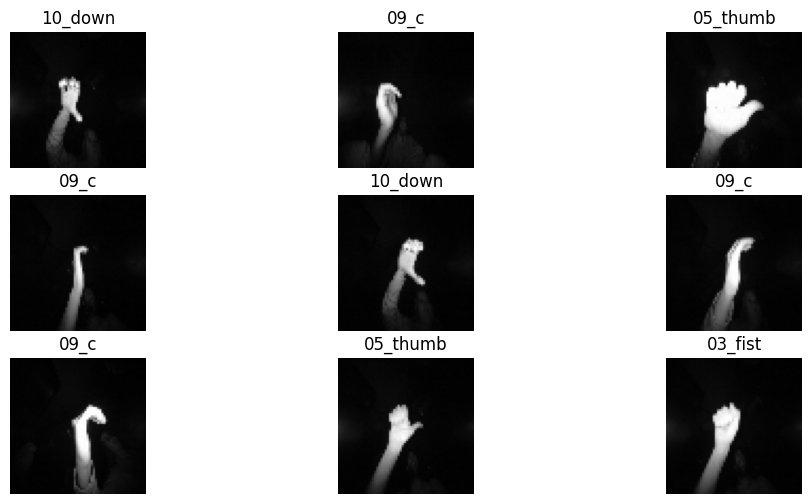

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

# Load images and labels
all_images = []
all_labels = []
for subject in subject_folders:
    subject_path = os.path.join(dataset_path, subject)
    gestures = os.listdir(subject_path)
    for gesture in gestures:
        gesture_path = os.path.join(subject_path, gesture)
        gesture_images, gesture_labels = load_images_from_folder(gesture_path, gesture)
        all_images.extend(gesture_images)
        all_labels.extend(gesture_labels)

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Resize images and normalize pixel values
all_images_resized = np.array([cv2.resize(img, (64, 64)) for img in all_images])
all_images_normalized = all_images_resized / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images_normalized, all_labels, test_size=0.2, random_state=42)

# Display a few sample images from the dataset
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


# Encode the labels 
Here, we encode the gesture labels into numerical format using `LabelEncoder`, which is essential for model training.




In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels as integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Apply the same transformation to test labels, if applicable


# Train the CNN model

We define a Convolutional Neural Network (CNN) model to classify the hand gestures. The model architecture includes convolutional layers for feature extraction, max-pooling layers for down-sampling, and dense layers for classification.

After compiling the model with the Adam optimizer and sparse categorical cross-entropy loss, we train it on the training data, while also validating its performance on a validation set.

Finally, we plot the training and validation accuracy to monitor the model's learning progress over the epochs.


In [5]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10


400/400 [==============================] - 30s 65ms/step - loss: 0.2888 - accuracy: 0.9052 - val_loss: 0.0139 - val_accuracy: 0.9972
Epoch 2/10
400/400 [==============================] - 25s 63ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.0362 - val_accuracy: 0.9925
Epoch 3/10
400/400 [==============================] - 26s 66ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 4/10
400/400 [==============================] - 26s 64ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0147 - val_accuracy: 0.9959
Epoch 5/10
400/400 [==============================] - 27s 67ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 6.8637e-04 - val_accuracy: 0.9997
Epoch 6/10
400/400 [==============================] - 26s 64ms/step - loss: 5.8769e-04 - accuracy: 0.9998 - val_loss: 5.9472e-04 - val_accuracy: 0.9997
Epoch 7/10
400/400 [==============================] - 26s 66ms/step - loss: 1.7820e-04 - accuracy: 0.9999 - val_loss: 4

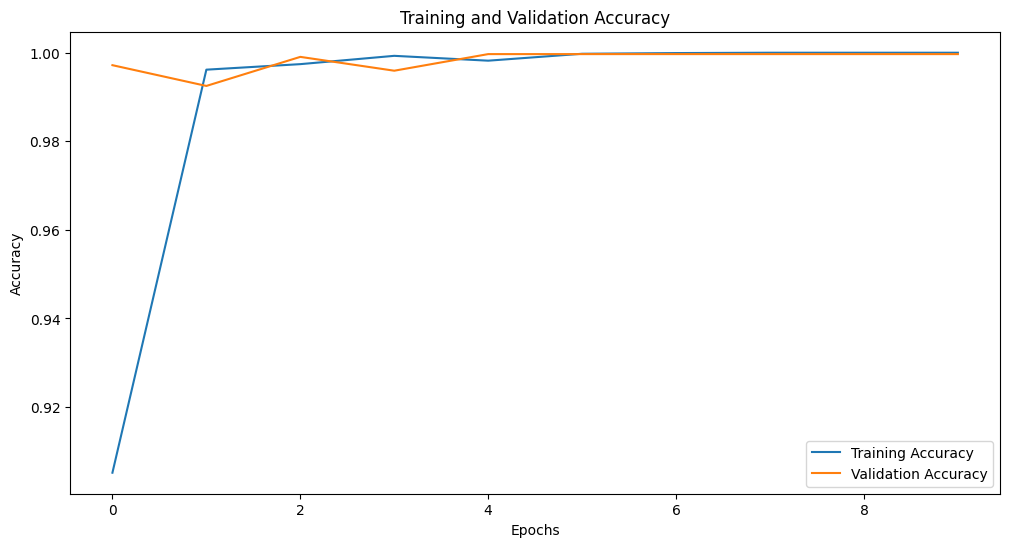

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Evaluate the model and display the confusion matrix and classification report

In this cell, we evaluate the trained CNN model on the test data to determine its accuracy.

We then generate predictions for the test set and create a confusion matrix to visualize how well the model has performed in classifying the different hand gestures.

Additionally, we print a classification report that provides detailed metrics such as precision, recall, and F1-score for each class, helping us understand the model's strengths and weaknesses.


125/125 [==============================] - 2s 15ms/step - loss: 5.0411e-04 - accuracy: 0.9998
Test Accuracy: 0.999750018119812
125/125 [==============================] - 2s 14ms/step


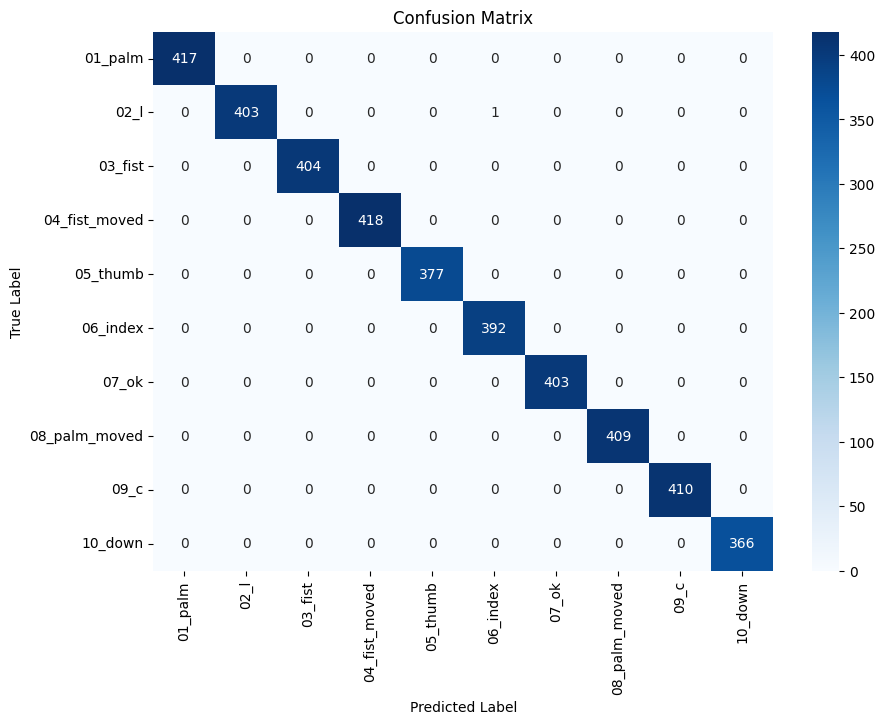

Classification Report:
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       417
         02_l       1.00      1.00      1.00       404
      03_fist       1.00      1.00      1.00       404
04_fist_moved       1.00      1.00      1.00       418
     05_thumb       1.00      1.00      1.00       377
     06_index       1.00      1.00      1.00       392
        07_ok       1.00      1.00      1.00       403
08_palm_moved       1.00      1.00      1.00       409
         09_c       1.00      1.00      1.00       410
      10_down       1.00      1.00      1.00       366

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict on test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_labels)
cr = classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(cr)


# Predict a hand gesture from a new image

This cell defines a function to predict the hand gesture from a new image provided by the user.

The image is preprocessed (grayscale conversion, resizing, and normalization) before being passed through the trained CNN model. The function then outputs the predicted gesture class.

We also test this function with a sample image to verify the model's prediction capabilities.


In [8]:
# Define a function to predict gesture from a new image
def predict_gesture(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (64, 64))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=(0, -1))
    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Test the model with a new image
test_image_path = 'palm.jpg'
predicted_class = predict_gesture(test_image_path)
print(f'Predicted Class: {predicted_class}')


1/1 [==============================] - 0s 189ms/step
Predicted Class: 2


# Test the model using real-time webcam input

In this cell, we use the webcam to capture live video frames, preprocess each frame, and then pass it through the trained CNN model to predict the hand gesture in real-time.

This allows us to test the model's performance on live data, providing a practical demonstration of its capabilities.


In [18]:
import cv2
import numpy as np

def predict_gesture_from_frame(frame):
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Resize to the same size as the training images
    resized_frame = cv2.resize(gray_frame, (64, 64))
    # Normalize the pixel values
    normalized_frame = resized_frame / 255.0
    # Expand dimensions to match input shape (batch_size, height, width, channels)
    expanded_frame = np.expand_dims(normalized_frame, axis=(0, -1))
    # Make prediction
    prediction = model.predict(expanded_frame)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Predict the gesture
        predicted_class = predict_gesture_from_frame(frame)
        predicted_label = label_encoder.inverse_transform([predicted_class])[0]

        # Display the resulting frame with the predicted label
        cv2.putText(frame, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('Gesture Recognition', frame)

        # Break the loop on 'q' or 'ESC' key press
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q') or key == 27:  
            break

    # Release the webcam and close windows
    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 36ms/step
